In [1]:
from Bio import SeqIO
from Bio import SeqUtils
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Alphabet import IUPAC

### Теория - задание 1

Наиболее надёжным методом предсказания третичной структуры белка является рентгеноструктурный анализ его кристализованной формы. Однако данный метод достаточно сложен в реализации и может осуществляться только в хорошо оборудованных лабораториях.

Существует большое количество возможных подходов к решению данной задачи с вычислительной точки зрения. В частности можно попытаться разбить первичную последовательность на маленькие участки, посмотреть, какие конформации соответствующих участков уже присутствуют в базе данных, а затем с помощью методов машинного обучения попытаться "собрать" из них структуру всего белка.

Также известно, что белки со схожей первичной структурой имеют схожее пространственное строение. Поэтому можно найти белок с похожей структурой, и "натянуть" нашу последовательность на его пространственное строение, после чего скорректировать конформацию с помощью минимизации энергии.

### Теория - задание 2

Выделение индивидуальных генов из генома можно производить с помощью поиска start- и stop- кодонов

### Практика - задание 1

In [8]:
import numpy as np

def e(s1, s2, i, j):
    if(s1[i] == s2[j]):
        return 1
    else:
        return -1

def create_matrix(s1, s2):
    m = len(s1) + 1
    n = len(s2) + 1
    a = np.zeros((n, m))
    
    for i in range(0, n):
        a[i][0] = -i
    for i in range(0, m):
        a[0][i] = -i
        
    for i in range(1, n):
        for j in range(1, m):
            a[i][j] = np.max([a[i-1][j-1] + e(s1, s2, j-1, i-1),
                             a[i-1][j] - 1,
                             a[i][j-1] - 1])
    
    #print (a)
    
    return a, n, m

def get_align(str1, str2):
    a, n, m = create_matrix(str1, str2)
    print("Score: {}".format(a[n-1][m-1]))
    i, j = n - 1, m - 1
    s1, s2 = "", ""
    while(i != 0 or j != 0):
        if(i == 0):
            j -= 1
            s2 += "-"
            s1 += str1[j]
        elif(j == 0):
            i -= 1
            s1 += "-"
            s2 += str2[i]
        else:
            if(a[i-1][j-1] >= a[i][j-1] and a[i-1][j-1] >= a[i-1][j]):
                j -= 1
                i -= 1
                s1 += str1[j]
                s2 += str2[i]
            elif(a[i-1][j] >= a[i-1][j-1] and a[i-1][j] >= a[i][j-1]):
                i -= 1
                s1 += "-"
                s2 += str2[i]
            elif(a[i][j-1] >= a[i-1][j-1] and a[i][j-1] >= a[i-1][j]):
                j -= 1
                s2 += "-"
                s1 += str1[j]
    
    s1 = s1[::-1]
    s2 = s2[::-1]
    return s1, s2

In [14]:
s1, s2 = get_align("CAGCACTTGGATTCTCGG", "CAGCGTGG")
print(s1)
print(s2+"\n")

Score: -2.0
CAGCACTTGGATTCTCGG
CAGC----G--T----GG



### Практика - задание 3

In [15]:
SeqIO.convert("cl.fq", "fastq", "cl.fasta", "fasta")

250

### Практика - задание 4

In [20]:
# 5’-GGATCGTAGCCTA-3’
dna_seq = Seq("GGATCGTAGCCTA", IUPAC.unambiguous_dna)
print("3'-" + dna_seq.complement() + "-5'")

3'-CCTAGCATCGGAT-5'


### Практика - задание 5

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0, 2, 2, 4, 4, 5, 6, 7, 9, 9, 10, 11, 12, 13, 15, 15, 16, 17, 17, 17]


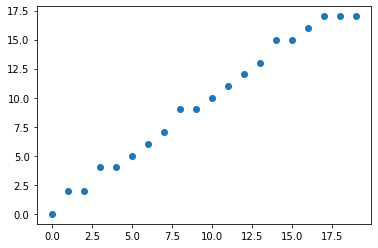

In [37]:
s1, s2 = "GCTAGTCAGATCTGACGCTA", "GATGGTCACATCTGCCGC--"
a1 = []
a2 = []

for i in range(0, len(s1)):
    a1.append(i)
    if(s1[i] == s2[i]):
        a2.append(i)
    else:
        for j1 in range(i, len(s1)):
            if(s1[j1] == s2[j1]):
                break
        for j2 in reversed(range(0, i)):
            if(s1[j2] == s2[j2]):
                break
        if(j1 == len(s1)-1):
            j1 = 20
        if(j2==0):
            j2 = -20
        if(j1 == 20):
            a2.append(j2)
        elif(j2==20):
            a2.append(j1)
        elif(j1 - i > i - j2):
            a2.append(j2)
        else:
            a2.append(j1) 
              
import matplotlib.pyplot as plt

print(a1)
print(a2)

plt.scatter(a1,a2)

### Практика - задание 6

Во втором случае штраф за продолжение гэпа значительно ниже, потому что мы предпочли не сделать ни одного mismatch, закрыв все несовпадения с помощью гэпа.

### Практика - задание 8

Последовательность 1:

    BLOSSUM: 0 - 10 - 1 - 10 - 1 - 1 - 1 = -24
    ID: -3 - 10 - 1 - 10 - 1 - 1 - 1 = -27
        
Последовательность 2:

    BLOSSUM: 0 - 10 - 2 - 10 = -22
    ID: -3 - 10 - 3 - 10 = -26

### Практика - задание 9

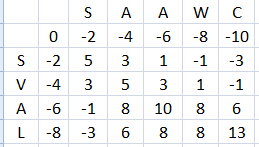